**Actividad 2.2 – Cuaderno demo UT2 - Ejercicios de ampliación**


---


Iván Falcón Monzón

## **Cuaderno demo: Panda, Numpy, MatPlotLib, funciones anónimas y carga de ficheros**

24_25


# Introducción a Numpy y Panda

Web: [Numpy](https://numpy.org/)

Web: [Pandas](https://pandas.pydata.org/)

Web: [Matplotlib](https://matplotlib.org/)

Web: [Scipy](https://scipy.org/)

Web: [Scikit-learn](https://scikit-learn.org/stable/)

In [1]:
import matplotlib
# CARGAMOS LIBRERIAS
# ==============================================================================
# Importamos la librería NUMPY para CÁLCULO NUMÉRICO Y ANÁLISIS DE DATOS
import numpy as np
# PANDAS para MANIPULACIÓN y ANÁLISIS DE DATOS
import pandas as pd
# MATPLOTLIB para GRAFICOS
import matplotlib.pyplot as plt
# SCIPY para CÁLCULO MATEMÁTICO
import scipy # necesario para conocer la versión
import scipy.stats as st
# Preprocesado
#==============================================================================
import sklearn # necesario para conocer la versión
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
# Versiones
#==============================================================================
version_np = np.version.version
version_pd = pd.__version__
version_plt = matplotlib.__version__
version_scipy = scipy.__version__
version_sklearn = sklearn.__version__

**Creación de objetos:**

1.   Objeto array (numpy)
2.   Objeto DataFrame (pandas)



**Objeto array** Todos los datos del mismo tipo (dtype)

In [2]:
# creación de una matriz de números floats
x=np.array([[1.,2,3, 4],[5,6,7,8],[9,10,11,12]])
x

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [3]:
# tipo de datos
x.dtype

dtype('float64')

In [4]:
# array con contenido de cadenas
x_txt=np.array([['a','b','c'],['d','e','f'],['g','h','i']])
x_txt.dtype # <U1 --> Significa tipo de dato unicode de longitud 1

dtype('<U1')

In [5]:
# Acceso a elementos x[filas,columnas]
# Atención: empieza a numerar desde el 0
x[0,0]

1.0

In [6]:
# También se puede utilizar
x[0][0]

1.0

In [7]:
# Columna 2
x[:,1]

array([ 2.,  6., 10.])

In [8]:
# Ejer 1: Mostrar la columa 4
x[:,3]

array([ 4.,  8., 12.])

In [9]:
# Fila 2
x[1,:]

array([5., 6., 7., 8.])

In [10]:
#Ejer 2: mostrar la fila 1
x[0,:]

array([1., 2., 3., 4.])

In [11]:
# Extraer la submatriz columnas 2 y 4
x_new=x[:,[1,3]]
x_new

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

In [12]:
#IVAN FALCON MONZON
#Ejer 3: Extraer la submatriz de las filas 1 y 3
#(índices 0 y 2)
x_new = x[[0, 2], :]
x_new

array([[ 1.,  2.,  3.,  4.],
       [ 9., 10., 11., 12.]])

In [13]:
#IVAN FALCON MONZON
#Otra forma del Ejer3: Para extraer las columnas de las filas 1 y 3
#(índices 0 y 2)
x_new=x[:,[0,2]]
x_new

array([[ 1.,  3.],
       [ 5.,  7.],
       [ 9., 11.]])

**Definición 1:** Crear un dataframe directamente

**¿Qué es un dataframe?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

Título: [Comenzando con datos](https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/)


**Objeto DataFrame** Las columnas de la tabla pueden tener diferentes *dtype*

In [14]:
# Definición de DataFrame
df=pd.DataFrame(
    {"A": 1.0,
     "B": pd.Categorical(["H","H","H","M","M"]),
     "C": np.array([1., 2., 3., 4., 5.]),
    }
)

In [15]:
# visualización del objeto DataFrame df
df

,A,B,C
0,1.0,H,1.0
1,1.0,H,2.0
2,1.0,H,3.0
3,1.0,M,4.0
4,1.0,M,5.0


In [16]:
df.dtypes

,0
A,float64
B,category
C,float64


In [17]:
#Resumen estadística basica descriptiva
df.describe()

,A,C
count,5.0,5.000000
mean,1.0,3.000000
std,0.0,1.581139
min,1.0,1.000000
25%,1.0,2.000000
50%,1.0,3.000000
75%,1.0,4.000000
max,1.0,5.000000


In [18]:
#IVAN FALCON MONZON
#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)
#Importar librería necesarías
import pandas as pd
import numpy as np

# Crear un DataFrame ficticio con municipios de Gran Canaria
data = {
    "Municipio": ["Las Palmas", "Telde", "Mogán", "Arucas", "San Bartolomé de Tirajana"],
    "Masculino": [350000, 100000, 25000, 50000, 65000],
    "Femenino": [360000, 110000, 30000, 52000, 67000],
    "Total Habitantes": [350000 + 360000, 100000 + 110000, 25000 + 30000, 50000 + 52000, 65000 + 67000],
}

# Crear el DataFrame
df_municipios = pd.DataFrame(data)

# Visualización del DataFrame
df_municipios

,Municipio,Masculino,Femenino,Total Habitantes
0,Las Palmas,350000,360000,710000
1,Telde,100000,110000,210000
2,Mogán,25000,30000,55000
3,Arucas,50000,52000,102000
4,San Bartolomé de Tirajana,65000,67000,132000


In [19]:
#IVAN FALCON MONZON
#Ejer 5: Mostrar los tipos de datos asociados a cada columna
df_municipios.dtypes

,0
Municipio,object
Masculino,int64
Femenino,int64
Total Habitantes,int64


In [20]:
#IVAN FALCON MONZON
#Ejer 6: modificar uno o más valores de una de las columnas
# Modificar valores en la columna "Masculino"
df_municipios.loc[df_municipios["Municipio"] == "Las Palmas", "Masculino"] = 400000
df_municipios.loc[df_municipios["Municipio"] == "Telde", "Masculino"] = 120000

# Mostrar el DataFrame modificado
df_municipios

,Municipio,Masculino,Femenino,Total Habitantes
0,Las Palmas,400000,360000,710000
1,Telde,120000,110000,210000
2,Mogán,25000,30000,55000
3,Arucas,50000,52000,102000
4,San Bartolomé de Tirajana,65000,67000,132000


In [21]:
#IVAN FALCON MONZON
#Ejer 7: Cambiar alguno de los valores de forma directa
# Cambiar directamente un valor
df_municipios.at[3, "Femenino"] = 55000  # Cambiar el valor de la columna "Femenino" en la fila 3 (Arucas)

# Mostrar el DataFrame modificado
df_municipios

,Municipio,Masculino,Femenino,Total Habitantes
0,Las Palmas,400000,360000,710000
1,Telde,120000,110000,210000
2,Mogán,25000,30000,55000
3,Arucas,50000,55000,102000
4,San Bartolomé de Tirajana,65000,67000,132000


In [22]:
#IVAN FALCON MONZON
#Ejer 8: Obtener estadística basica descriptiva
# Obtener la estadística descriptiva básica
estadisticas = df_municipios.describe()

# Mostrar el resumen estadístico
estadisticas

,Masculino,Femenino,Total Habitantes
count,5.000000,5.000000,5.000000
mean,132000.000000,124400.000000,241800.000000
std,153809.947663,134849.175007,267729.714451
min,25000.000000,30000.000000,55000.000000
25%,50000.000000,55000.000000,102000.000000
50%,65000.000000,67000.000000,132000.000000
75%,120000.000000,110000.000000,210000.000000
max,400000.000000,360000.000000,710000.000000


**Definición 2**: a partir de un objeto array (creado con numpy) crear un dataframe

In [23]:
# creamos 70 fechas consecutivas iniciando en el día 10-sep-2022, (en inglés, 20220910)
fechas = pd.date_range("20220910", periods=70)
fechas

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [24]:
# x-> datos, index-> nombre de filas (es la forma con la que se podrán identificar cada fila), colums-> nombre de columnas
# Generamos una matriz de 70 filas por 2 columnas de números aleatorios "normales" (Distribución normal)
# de media 0 y desviación típica 1
df_fechas = pd.DataFrame(np.random.randn(70, 2),index=fechas,columns=["col1","col2"])
df_fechas

,col1,col2
2022-09-10,1.101767,0.196181
2022-09-11,-0.778365,-2.011628
2022-09-12,-1.020534,-0.675557
2022-09-13,-0.392254,-0.365696
2022-09-14,1.503609,0.651210
...,...,...
2022-11-14,-0.134696,-0.641365
2022-11-15,-1.525130,1.235891
2022-11-16,1.001197,1.074383
2022-11-17,2.518251,-0.095916


In [25]:
# Metodos objeto.metodo df.< TAB >
# Ejemplos: situate al final del comando + barra espaciadora
#           df.head() primeros registros
#           df.tail() ultimos registros
#           df.index() nombre de las filas
#           df.columns()  nombre de las columnas
#           df.describe() estadística basica descriptiva
#           df.T() transpuesta
df_fechas.describe()

,col1,col2
count,70.000000,70.000000
mean,0.001507,0.123245
std,1.038207,0.904887
min,-3.293610,-2.011628
25%,-0.615080,-0.578894
50%,-0.099635,0.195327
75%,0.710368,0.773912
max,2.518251,1.992985


In [26]:
#IVAN FALCON MONZON
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos
#     a)   df_fechas.head() primeros registros
#     b)   df_fechas.tail() ultimos registros
#     c)   df_fechas.index nombre de las filas
#     d)   df_fechas.columns  nombre de las columnas
#     e)   df_fechas.describe() estadística basica descriptiva
#     f)   df_fechas.T transpuesta

# Primero importar las librerías necesarias
import pandas as pd
import numpy as np

# Paso 1: Crear 70 fechas consecutivas a partir del 10 de septiembre de 2022, (en inglés, 20220910)
fechas = pd.date_range("20220910", periods=70)

# Generamos una matriz de 70 filas por 2 columnas de números aleatorios (Distribución normal)
df_fechas = pd.DataFrame(np.random.randn(70, 2), index=fechas, columns=["col1", "col2"])

# Mostrar el DataFrame creado
print("DataFrame de fechas y números aleatorios:")
print(df_fechas)

# Paso 2: Aplicar los comandos solicitados

# a) df_fechas.head() -> Muestra los primeros registros
print("\nPrimeros registros (head):")
print(df_fechas.head())

# b) df_fechas.tail() -> Muestra los últimos registros
print("\nÚltimos registros (tail):")
print(df_fechas.tail())

# c) df_fechas.index -> Muestra los índices (fechas) del DataFrame
print("\nÍndices del DataFrame (fechas):")
print(df_fechas.index)

# d) df_fechas.columns -> Muestra los nombres de las columnas
print("\nNombres de las columnas:")
print(df_fechas.columns)

# e) df_fechas.describe() -> Muestra estadísticas básicas descriptivas
print("\nEstadísticas básicas descriptivas (describe):")
print(df_fechas.describe())

# f) df_fechas.T -> Muestra la transpuesta del DataFrame
print("\nTranspuesta del DataFrame (T):")
print(df_fechas.T)

DataFrame de fechas y números aleatorios:
                col1      col2
2022-09-10 -0.915954  0.473124
2022-09-11  0.015301  2.213295
2022-09-12 -0.184665  0.618084
2022-09-13  0.274203  0.688836
2022-09-14 -0.717937  0.229465
...              ...       ...
2022-11-14 -0.988593  0.391584
2022-11-15  1.485387  1.403271
2022-11-16  0.053596  0.821700
2022-11-17  0.199656  0.097148
2022-11-18 -0.180806  1.193300

[70 rows x 2 columns]

Primeros registros (head):
                col1      col2
2022-09-10 -0.915954  0.473124
2022-09-11  0.015301  2.213295
2022-09-12 -0.184665  0.618084
2022-09-13  0.274203  0.688836
2022-09-14 -0.717937  0.229465

Últimos registros (tail):
                col1      col2
2022-11-14 -0.988593  0.391584
2022-11-15  1.485387  1.403271
2022-11-16  0.053596  0.821700
2022-11-17  0.199656  0.097148
2022-11-18 -0.180806  1.193300

Índices del DataFrame (fechas):
DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '20


**Selección de registros**

*   Por etiquetas
*   Por posición
*   Por condición booleana








In [27]:
# Selección de columnas (variable)
# Varias columnas df[["col1","col2"]]
df_fechas[["col2"]]

,col2
2022-09-10,0.473124
2022-09-11,2.213295
2022-09-12,0.618084
2022-09-13,0.688836
2022-09-14,0.229465
...,...
2022-11-14,0.391584
2022-11-15,1.403271
2022-11-16,0.821700
2022-11-17,0.097148


In [28]:
# Selección de filas
# del 01 al 31 de octubre
df_fechas["20221001":"20221031"]

,col1,col2
2022-10-01,-0.168814,-0.373281
2022-10-02,-1.467026,0.592410
2022-10-03,-1.478501,-2.223963
2022-10-04,0.571321,0.942593
2022-10-05,-0.624344,-0.186870
2022-10-06,1.256478,-0.216579
2022-10-07,0.732492,-2.103951
2022-10-08,-0.006491,-1.170930
2022-10-09,-0.480357,-1.050292
2022-10-10,0.113767,-1.535623


In [29]:
# Selección de submatriz (slice)
# Método .loc selección por etiquetas
df_fechas.loc["20220920":"20220930", ["col1", "col2"]]

,col1,col2
2022-09-20,-0.399900,0.179813
2022-09-21,-1.403244,-0.371421
2022-09-22,-2.676756,0.399508
2022-09-23,-0.861408,0.120027
2022-09-24,0.232056,0.611274
2022-09-25,-3.161063,2.128153
2022-09-26,2.426076,0.193515
2022-09-27,1.329902,-1.319742
2022-09-28,0.799841,-0.602137
2022-09-29,-0.126738,0.769392


In [30]:
# Selección por posición
# df.iloc[filas, columnas]
# df.iloc[ posiciones 1, 2, 3 , 4, posiciones 0]
# df.iloc[ filas 2, 3, 4, 5, columna 1]
df.iloc[1:5, 0:1]

,A
1,1.0
2,1.0
3,1.0
4,1.0


In [31]:
# Selección por condición booleana
# Nos quedamos con los datos que tienen un valor positivo en la columna indicada
df1=df[df["C"]>3]
df1

,A,B,C
3,1.0,M,4.0
4,1.0,M,5.0


**El método apply**: se combina una funcionalidad de Numpy en un objeto dataframe

In [32]:
# aplicamos la función suma acumulada definida en numpy a nuestros datos (dataframe)
df_fechas.apply(np.cumsum)

,col1,col2
2022-09-10,-0.915954,0.473124
2022-09-11,-0.900653,2.686419
2022-09-12,-1.085318,3.304503
2022-09-13,-0.811115,3.993340
2022-09-14,-1.529052,4.222805
...,...,...
2022-11-14,-6.292561,7.649932
2022-11-15,-4.807175,9.053203
2022-11-16,-4.753578,9.874903
2022-11-17,-4.553922,9.972051


**Definición de funciones anónimas**

In [33]:
# La función x toma el argumento a, le suma 10 y lo devuelve
mi_funcion_anonima = lambda a : a + 10
print(mi_funcion_anonima(5))

15


In [34]:
mi_funcion_anonima_1 = lambda a, b : a * b
print(mi_funcion_anonima_1(5, 6))

30


In [35]:
df['C']

,C
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [36]:
df['C'].max()

5.0

In [37]:
df['C'].min()

1.0

In [38]:
#IVAN FALCON MONZON
#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole por parámetro la columna "C" de df obtenga el rango
#      de los valores que forman parte de dicha columna

# Primero importar las librerías necesarias
import pandas as pd
import numpy as np

# DataFrame ficticio
data = {
    "A": [1, 2, 3, 4, 5],
    "B": [5, 6, 7, 8, 9],
    "C": [10, 20, 15, 25, 30]  # Columna C con valores que usaremos para calcular el rango
}

df = pd.DataFrame(data)

# Crear la función anónima mi_funcion_rango
mi_funcion_rango = lambda columna: columna.max() - columna.min()

# Aplicar la función a la columna "C" del DataFrame
rango_columna_C = mi_funcion_rango(df['C'])

# Mostrar el resultado
# La operación del resultado sería: Rango = 30 (máximo) - 10 (mínimo) = 20
print("El rango de los valores en la columna 'C' es:", rango_columna_C)

El rango de los valores en la columna 'C' es: 20


A continuación tenemos unos accesos que nos permitiran conocer de forma rápida las librerías de Matplotlib y Pandas

[introducción rápida a Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/#integraci%C3%B3n-con-pandas)

[Introducción rápida a Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# **Ya podemos empezar**

In [39]:
# Descargar el dataset que se utilizará utilizando un enlace compartido de google drive
# Si la URL es https://drive.google.com/file/d/IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
# En nuestro caso, hemos de hacer uso de parte de la información que hay en el siguiente enlace, que corresponde
# con el enlace cuando se comparte un fichero:
#
# https://drive.google.com/file/d/18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5/view?usp=sharing
#
# Este comando Linux, solo funciona en Google Colab, no en local
# Con la exclamación ! ejecutamos un comando (programa) Linux que se ejecuta en la máquina virtual
!gdown --id 18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
#
# Ignorar el mensaje que se muestra al ejecutarse, indicando que el comando -id is deprecated
#
# Una vez ha sido descargado a nuestros recursos de  Google Colab, como recurso de este cuaderno, es interesante descargarlo
# y abrirlo con alguna herramienta  con Notepad++ o LibreOffice

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
To: /content/datos.csv
100% 427/427 [00:00<00:00, 1.83MB/s]


In [40]:
# Cargamos el fichero csv  denominado datos.csv con
Datos= pd.read_csv('datos.csv', delimiter=';')
# importante--> OBSERVAR que Datos es un DataFrame como el df que se ha trabajado anteriormente
# Mostrar filas y columnas de la matriz de datos
Datos.shape

(19, 3)

In [41]:
# Mostramos el contenido de los datos (variables)
# Contiene la renta media en 2020 por comunidades y la variación de rentas (en porcentajes) respecto al año anterior
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [42]:
# Mostramos las comunidades autónomas
Datos["Comunidad"]

,Comunidad
0,ANDALUCIA
1,ARAGON
2,ASTURIAS
3,BALEARS
4,CANARIAS
5,CANTABRIA
6,CASTILLA Y LEON
7,CASTILLA Y LA MANCHA
8,CATALUNYA
9,VALENCIA


In [43]:
# Le cambiamos el nombre de la comunidad de CANARIAS a Islas Canarias
Datos.iloc[4,0]='Islas Canarias'
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,Islas Canarias,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [44]:
#IVAN FALCON MONZON
#Ejer 11: Volver a cambiar a CANARIAS
Datos.iloc[4,0]= 'CANARIAS'
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [45]:
Datos.describe()

,Renta,DiferenciaRenta
count,19.000000,19.000000
mean,22795.684211,-9.726316
std,4542.137982,4.164245
min,17448.000000,-22.700000
25%,19464.000000,-10.150000
50%,21903.000000,-8.600000
75%,26113.000000,-7.450000
max,32048.000000,-5.200000


**Objeto matriz de numpy**

In [46]:
# Transformamos una parte del objeto DataFrame a un objeto matriz para trabajar con métodos de numpy
DatosMatriz=Datos[["Renta", "DiferenciaRenta"]].to_numpy()
DatosMatriz

# Por curiosidad, fijarse como los datos de Canarias coinciden en la fila (al igual que el resto de los datos...)

array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Visualizar DatosMatriz**

In [47]:
DatosMatriz

array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Cálculo de la media y desviación típica**

In [48]:
np.mean(DatosMatriz,axis=0) # Calcula la media aritmetica de los datos,
                      # (por columnas) axis=1 para calcular la media por filas

array([ 2.27956842e+04, -9.72631579e+00])

**Librería matplotlib: Histograma**

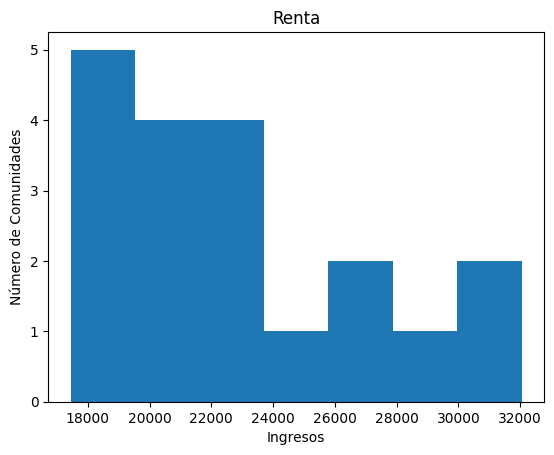

In [49]:
# Para mostrar en el histograma los datos de ingresos hemos de indicar que queremos todas las filas de la primera columna
plt.hist(DatosMatriz[:,0],7 ) # recordar, columna 0 = primera variable y el 7 indica el número de grupos(columnas) a mostrar
#plt.hist(DatosMatriz[:,0]) # recordar, columna 0 = primera variable
plt.ylabel('Número de Comunidades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()

In [50]:
#IVAN FALCON MONZON
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta
#      Apartado 1: Renta entre 26000€ y 28000€
#      Apartado 2: Renta superior a 30000€
#--------------------------------------------------------------------------------------------------------------------------------------
# Apartado 1: Filtrar comunidades con renta entre 26,000€ y 28,000€
filtro_renta_entre_26000_y_28000 = Datos[(Datos['Renta'] >= 26000) & (Datos['Renta'] <= 28000)]

# Mostrar el resultado de la filtración
print("Comunidades con renta entre 26000€ y 28000€:")
print(filtro_renta_entre_26000_y_28000)

# Apartado 2: Filtrar comunidades con renta superior a 30,000€
filtro_renta_superior_30000 = Datos[Datos['Renta'] > 30000]

# Mostrar el resultado de la filtración
print("\nComunidades con renta superior a 30000€:")
print(filtro_renta_superior_30000)

Comunidades con renta entre 26000€ y 28000€:
   Comunidad  Renta  DiferenciaRenta
1     ARAGON  26512             -7.8
8  CATALUNYA  27812            -10.9

Comunidades con renta superior a 30000€:
     Comunidad  Renta  DiferenciaRenta
12      MADRID  32048            -11.1
15  PAIS VASCO  30401            -10.4


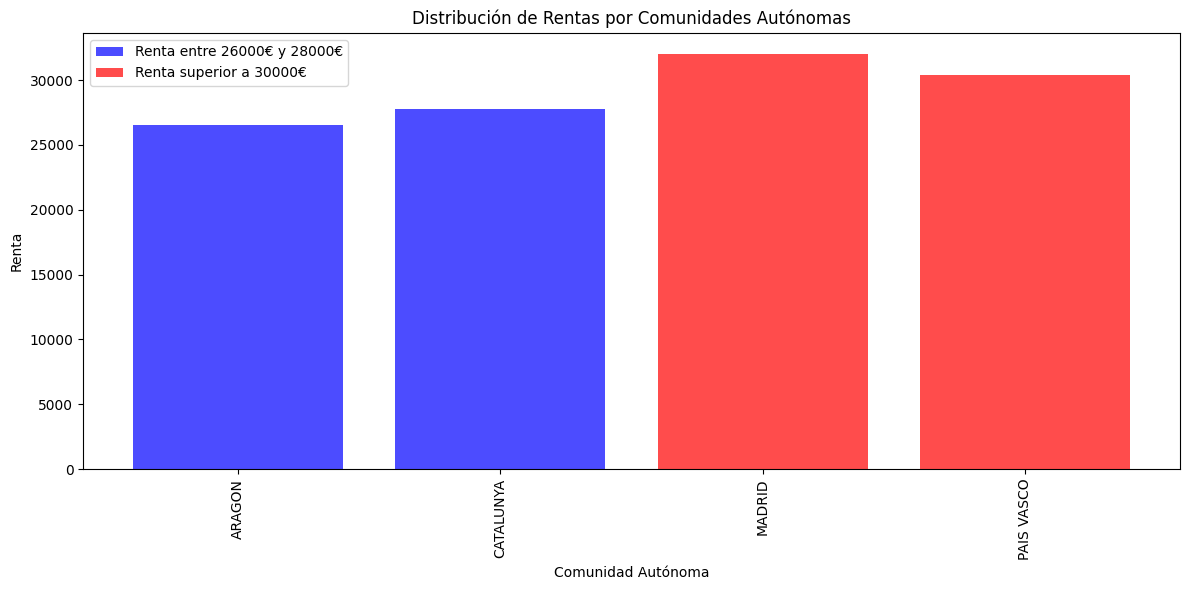

In [51]:
#IVAN FALCON MONZON
#Ejer12 con Librería matplotlib: Histograma

#Pasos para visualizar el histograma:
import matplotlib.pyplot as plt

# Apartado 1: Filtrar comunidades con renta entre 26,000€ y 28,000€
filtro_renta_entre_26000_y_28000 = Datos[(Datos['Renta'] >= 26000) & (Datos['Renta'] <= 28000)]

# Apartado 2: Filtrar comunidades con renta superior a 30,000€
filtro_renta_superior_30000 = Datos[Datos['Renta'] > 30000]

# Preparar los datos para el diagrama de barras
comunidades_26000_28000 = filtro_renta_entre_26000_y_28000['Comunidad']
renta_26000_28000 = filtro_renta_entre_26000_y_28000['Renta']

comunidades_30000 = filtro_renta_superior_30000['Comunidad']
renta_30000 = filtro_renta_superior_30000['Renta']

# Visualizar los resultados con un diagrama de barras
plt.figure(figsize=(12,6))

# Diagrama de barras para renta entre 26000€ y 28000€
plt.bar(comunidades_26000_28000, renta_26000_28000, alpha=0.7, label="Renta entre 26000€ y 28000€", color='blue')

# Diagrama de barras para renta superior a 30000€
plt.bar(comunidades_30000, renta_30000, alpha=0.7, label="Renta superior a 30000€", color='red')

# Etiquetas y título
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Renta')
plt.title('Distribución de Rentas por Comunidades Autónomas')

# Rotar las etiquetas del eje X para mayor visibilidad
plt.xticks(rotation=90)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

¿Y si queremos visualizar la diferencia de ingresos?

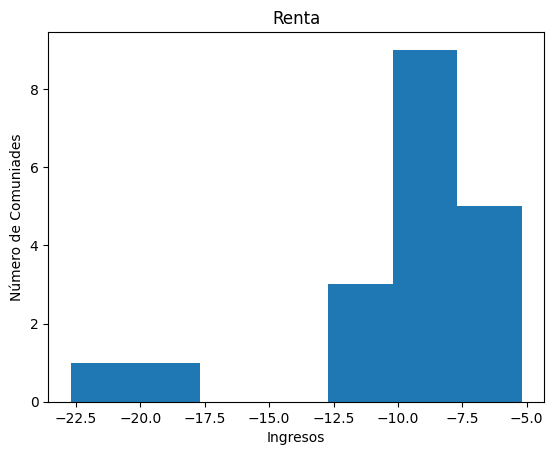

In [52]:
plt.hist(DatosMatriz[:,1],7 ) # columna 1 = segunda variable
plt.ylabel('Número de Comuniades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()



# Vamos a analizar los datos de muestra de las comunidades autónomas para la Detección de **outliers**
Adaptación del cuaderno **Ejemplo 2.3 Outliers.ipynb**

In [53]:
Ingresos=DatosMatriz[:,0] # Ingresos medios
datos=Ingresos # para reutilizar el código

**MÉTODO 1:**  Basado en la distribución normal

In [54]:
# CRITERIO 1: PROBABILIDAD GLOBAL
# probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global de una cola
alfa_g=(1-p_g)/2
# probabilidad  de las colas para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos))
## CRITERIO 2:  Criterio Chauvenet
#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)# k
print(f" Alfa ={alfa}")
print(f" CUANTIL Z_(1-alfa/2) ={Z_alfa}")

 Alfa =0.00133
 CUANTIL Z_(1-alfa/2) =3.20907


In [55]:
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ 8608.4099,36982.9585]


In [56]:
# No hay ninguna comunidad outlier respecto a los ingresos
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")

**MÉTODO 2:**  Basado en la distancia entre cuartiles

In [57]:
Q1 = np.quantile(datos,0.25)
Q3 = np.quantile(datos,0.75)
IQR = Q3 - Q1
k=1.5
xL=Q1 - k * IQR
xU=Q3 + k * IQR
outlier=np.array([]) # almacenamiento de las posiciones de los outliers
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")
          outlier=np.concatenate((outlier,np.array([i])))

**¿Qué comunidades son?**

In [58]:
Datos.loc[outlier,"Comunidad"]

,Comunidad


# Aplicamos las técnicas de **escalameniento de datos** a la información que tenemos de las comunidades autónomas

Adaptación del cuaderno **Ejemplo 2.5 Escalamiento de datos.**ipynb

In [59]:
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [60]:
# Escalamiento
# ==============================================================================
# Selección de columnas numéricas tipo doble o enteras
numeric_cols = Datos.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler
preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Datos_prep_SS = preprocessor_SS.fit_transform(Datos)
Datos_prep_MM = preprocessor_MM.fit_transform(Datos)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)

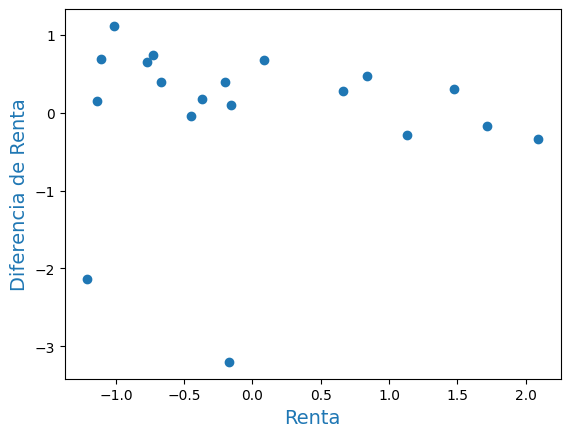

In [61]:
# Representación de las dos variables escaladas z-score
fig, ax = plt.subplots()
ax.scatter(Datos_prep_SS[:,0], Datos_prep_SS[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()

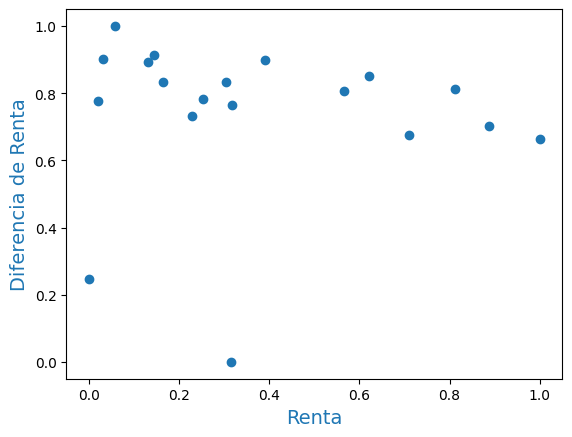

In [62]:
# Representación de las variables escaladas Min-Max
fig, ax = plt.subplots()
ax.scatter(Datos_prep_MM[:,0], Datos_prep_MM[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()

<Axes: xlabel='Renta', ylabel='DiferenciaRenta'>

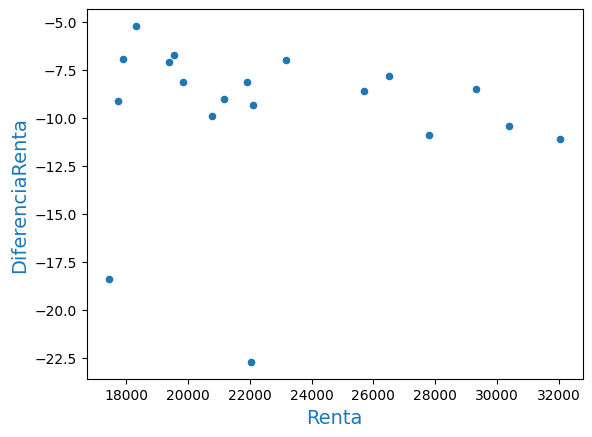

In [63]:
# Dibujar los datos originales. Integración de matplotlib con pandas
# df.plot
fig, ax = plt.subplots()
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
Datos.plot(kind='scatter', x='Renta', y='DiferenciaRenta',ax=ax)